In [88]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
en_stops = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [89]:
def clean_stopwords(text):
  text_tokens = word_tokenize(text)
  salida = ""
  for word in text_tokens:
    if not word in stopwords.words('english'):
      salida+= word + " "
  return salida

lemmatizer = WordNetLemmatizer()

def lemmatizar(texto):
  sep = texto.split()
  salida = ""
  for i in sep:
    salida += lemmatizer.lemmatize(i) + " "
  return salida[:len(salida)-1]

In [90]:
import nltk
nltk.download('omw-1.4')

def replace_simbols(in_str):
    in_str = str(in_str)
    in_str = re.sub(r'[°|¬\!"#$%&/()=?¡¿?´¨+*~`{}^;:_,.-<>]', ' ', in_str)
    in_str = re.sub(r'[^a-zA-Z \n\.]', ' ', in_str)
    return in_str

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [100]:
A = """
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.
"""
print("original: ", A)
A = clean_stopwords(A)
A = lemmatizar(A)
A = replace_simbols(A)
print("sym: ",A)


original:  
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.

sym:  Many time might seen cloud filled lot word different size   represent frequency importance word   This called Tag Cloud word cloud   For tutorial   learn create word cloud Python customize see fit   This tool handy exploring text data making report lively  


Data sets to display the cloud

In [80]:
A = """
Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called a Tag Cloud or word cloud. For this tutorial, you will learn how to create a word cloud in Python and customize it as you see fit. This tool will be handy for exploring text data and making your report more lively.
"""
B = """
It's important to remember that while word clouds are useful for visualizing common words in a text or data set, they're usually only useful as a high-level overview of themes. They're similar to bar blots but are often more visually appealing (albeit at times harder to interpret). Word clouds can be particularly helpful when you want to:
"""


A = set(A.lower().split())
B = set(B.lower().split())
print("A = ", A)
print("B = " ,B)

A =  {'handy', 'as', 'many', 'for', 'might', 'the', 'sizes,', 'this', 'is', 'called', 'tag', 'of', 'tutorial,', 'times', 'see', 'in', 'cloud.', 'to', 'exploring', 'your', 'report', 'more', 'represent', 'word.', 'importance', 'word', 'which', 'different', 'filled', 'fit.', 'each', 'text', 'learn', 'you', 'or', 'cloud', 'be', 'tool', 'data', 'it', 'words', 'create', 'a', 'and', 'have', 'lots', 'lively.', 'making', 'python', 'with', 'how', 'seen', 'frequency', 'will', 'customize'}
B =  {'as', 'harder', 'set,', 'helpful', 'want', 'for', 'particularly', 'common', 'visualizing', 'of', '(albeit', 'bar', 'times', 'are', 'to', 'in', 'only', 'more', 'but', 'when', 'that', 'word', 'similar', 'interpret).', 'blots', 'at', 'text', 'usually', 'visually', 'often', 'remember', 'or', 'while', 'clouds', 'you', 'be', 'useful', 'data', "it's", 'important', 'words', 'a', "they're", 'can', 'to:', 'appealing', 'high-level', 'themes.', 'overview'}


In [81]:
!pip install matplotlib-venn-wordcloud

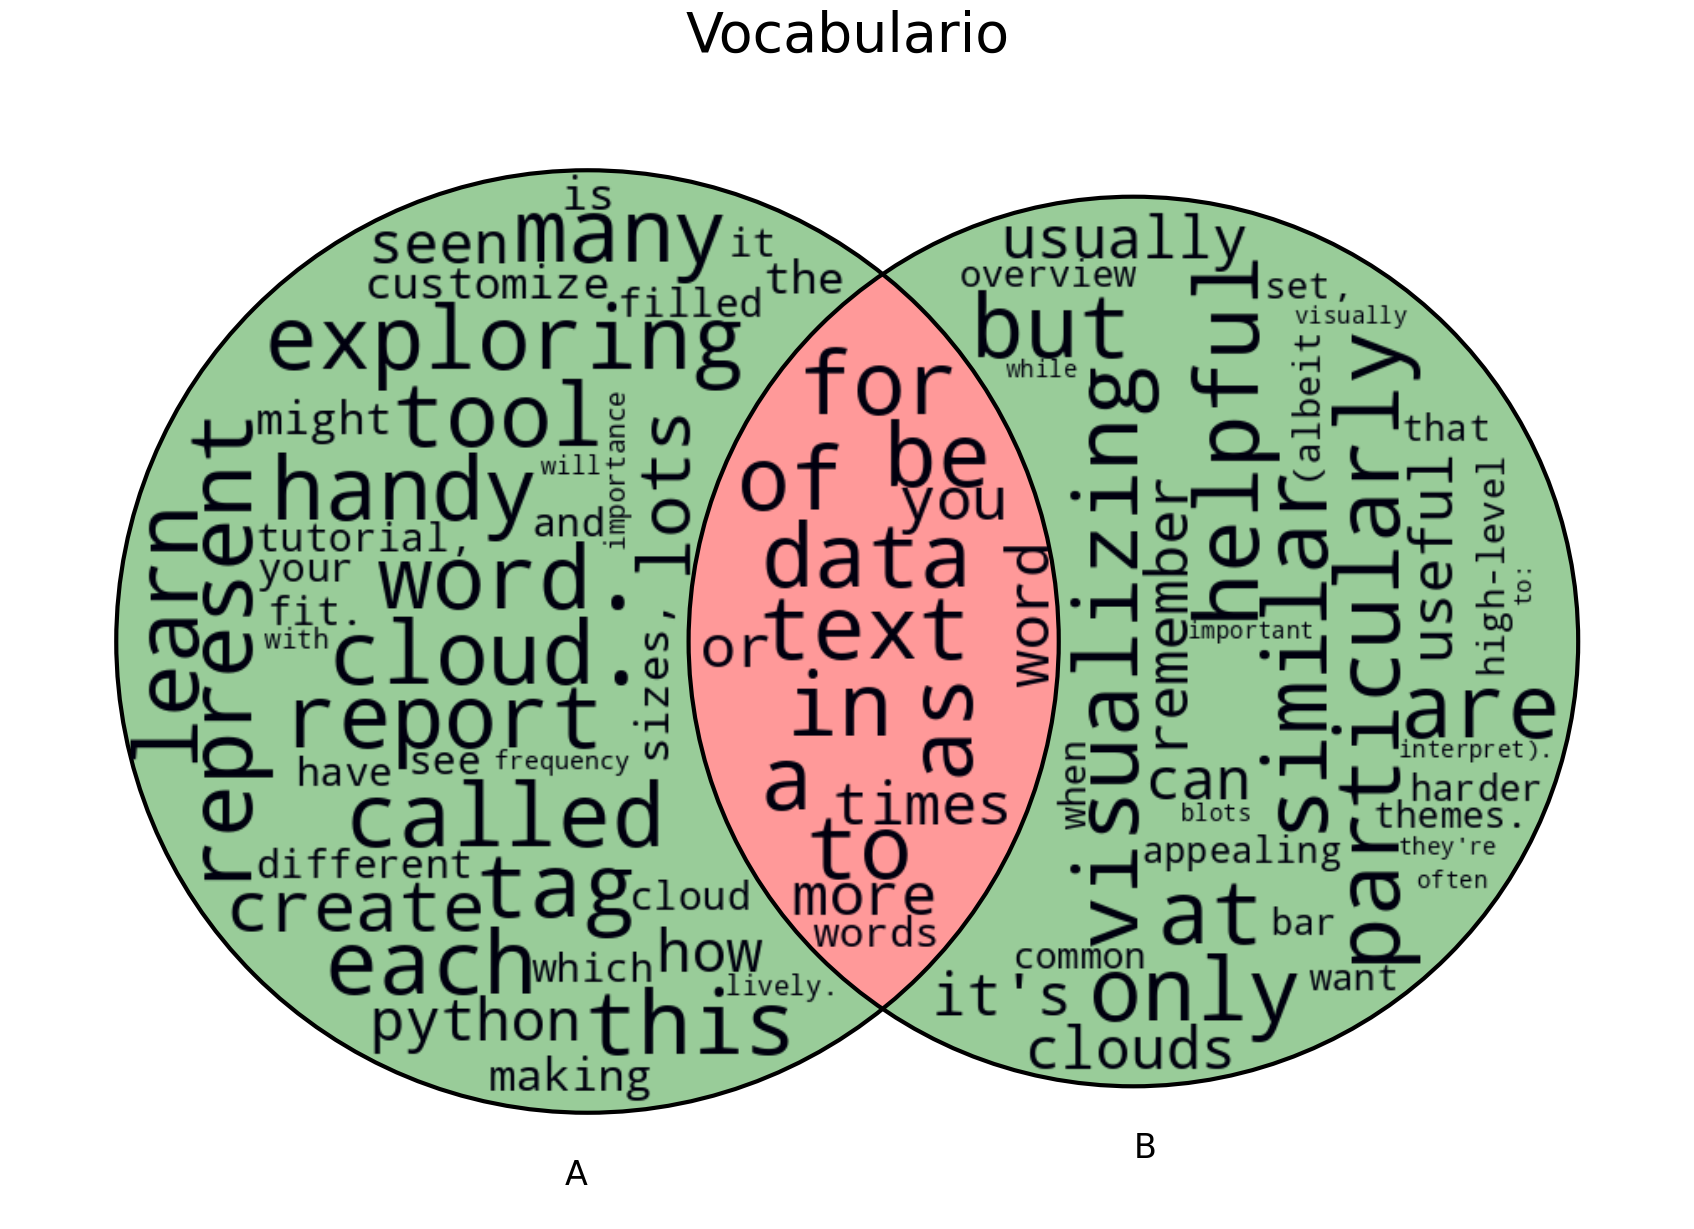

In [82]:
from matplotlib import pyplot as plt
from matplotlib_venn_wordcloud import venn2_wordcloud
fig, ax = plt.subplots(figsize=(30,15))


ax.set_title("Vocabulario", fontsize=40)
v = venn2_wordcloud([A,B],ax=ax, set_labels=["A", "B"])
# add color

v.get_patch_by_id("10").set_color("green")
v.get_patch_by_id("10").set_alpha(0.4)
v.get_patch_by_id("01").set_color("green")
v.get_patch_by_id("01").set_alpha(0.4)
v.get_patch_by_id("11").set_color("red")
v.get_patch_by_id("11").set_alpha(0.4)
fig.savefig("diagrama.png")

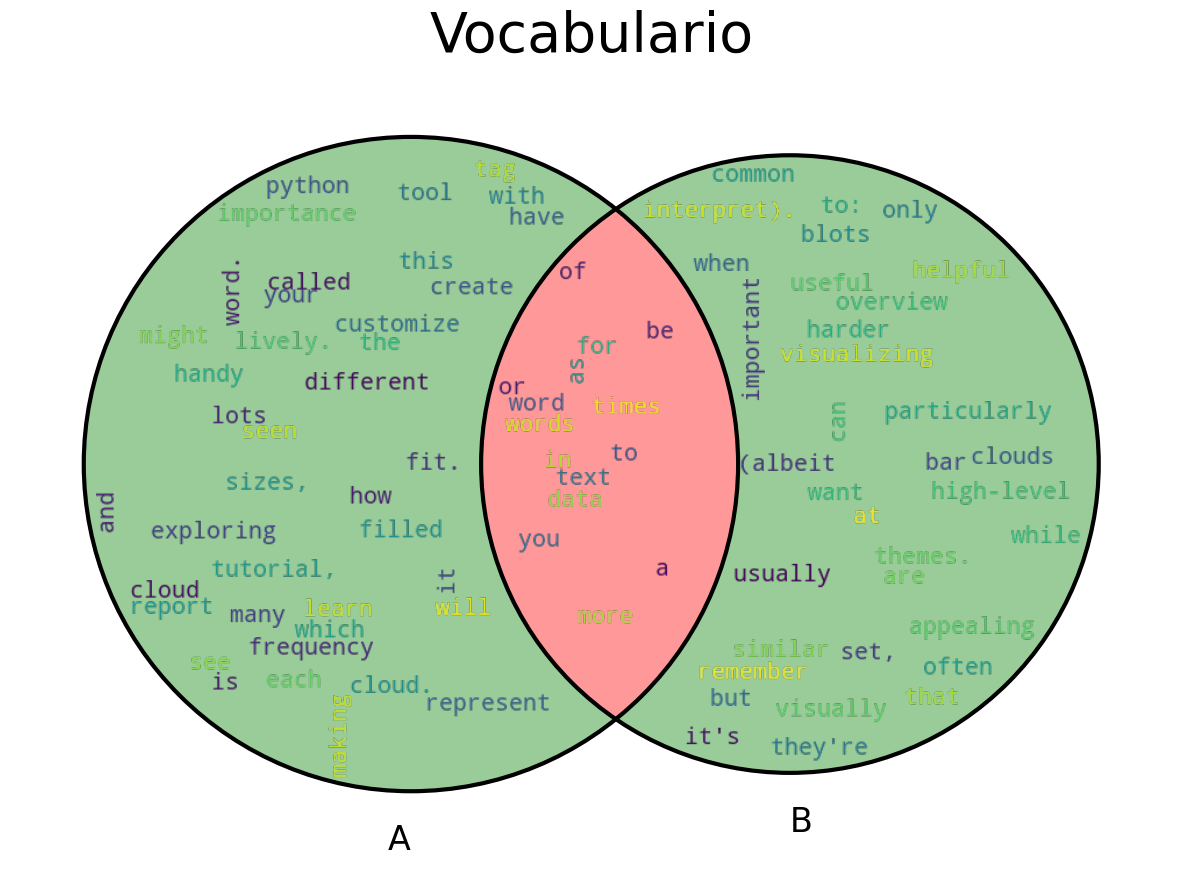

In [83]:
from matplotlib_venn_wordcloud import venn2_wordcloud
fig, ax = plt.subplots(figsize=(15,15))


ax.set_title("Vocabulario", fontsize=40)
v = venn2_wordcloud([A,B],ax=ax, set_labels=["A", "B"], wordcloud_kwargs=dict(max_font_size=20, min_font_size=10, contour_color="black"))
# add color
v.get_patch_by_id("10").set_color("green")
v.get_patch_by_id("10").set_alpha(0.4)
v.get_patch_by_id("01").set_color("green")
v.get_patch_by_id("01").set_alpha(0.4)
v.get_patch_by_id("11").set_color("red")
v.get_patch_by_id("11").set_alpha(0.4)


fig.savefig("diagrama.png")

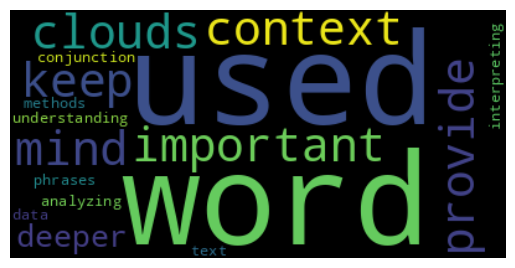

In [84]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(D)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

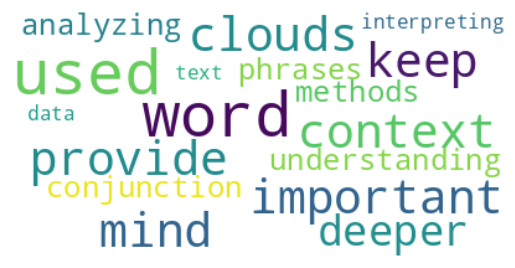

In [85]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(D)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [86]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")